In [ ]:
#!pip install -U seaborn

In [ ]:
# Importa os pacotes de manipulação e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a formatação padrão para a visualização de dataframes 
# completos e números com 2 casas decimais
pd.set_option('display.max_columns', None)
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
# Traz o dataframe à partir do csv de dados de crédito bancário
df = pd.read_csv(".\BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06,0.00,1.00
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10,0.00,1.00
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00,0.00,1.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76,0.00,1.00
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00,0.00,1.00


## 1) Apresente as características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários.

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset=['CLIENTNUM']).sum()

0

In [ ]:
# Excluindo colunas que contém 'Naive_Bayes', que são colunas 
# numéricas usadas para modelagem, e o número do cliente
# que é uma coluna numérica que seria utilizada somente como 
# chave primária para cruzar com outros dataframes, e não carrega
# informação acionável
drop_col = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df1 = df.drop(drop_col, axis=1)
df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,"12,691.00",777,"11,914.00",1.33,1144,42,1.62,0.06
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,"8,256.00",864,"7,392.00",1.54,1291,33,3.71,0.10
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,"3,418.00",0,"3,418.00",2.59,1887,20,2.33,0.00
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,"3,313.00",2517,796.00,1.41,1171,20,2.33,0.76
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,"4,716.00",0,"4,716.00",2.17,816,28,2.50,0.00


In [ ]:
print(df1.shape)
df1.info()

(10127, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

In [ ]:
# Separamos as colunas de acordo com o tipo de dado que carregam, numéricos ou categóricos
headers = ['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

num_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
            'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [ ]:
# Para observarmos o range de valores que cada coluna pode apresentar,
# para cada coluna, pegamos seus valores únicos e ordenamos em ordem crescente
# for col in headers:
#     print(f'{col} \n {np.sort(df[col].unique())} \n')

In [ ]:
# for col in cat_cols:
# #     print(f'{col} \n {df[col].value_counts()} \n')
#     df_line = df.groupby([col])[['Attrition_Flag']].count().sort_index(ascending = False)
#     df_line = df_line.rename({'Attrition_Flag': 'Count'}, axis = 1)
#     df_line['Percentage_%'] = 100*df_line['Count']/(df_line['Count'].sum())
#     display(df_line)

In [ ]:
# Além da visualização dos valores únicos, o df.describe
# nos mostra uma ideia da distribuição das colunas numéricas
# e nos ajuda a entender se as colunas apresentam algum valor 'não esperado/estranho'
df1.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,"10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00","10,127.00"
mean,46.33,2.35,35.93,3.81,2.34,2.46,"8,631.95","1,162.81","7,469.14",0.76,"4,404.09",64.86,0.71,0.27
std,8.02,1.30,7.99,1.55,1.01,1.11,"9,088.78",814.99,"9,090.69",0.22,"3,397.13",23.47,0.24,0.28
min,26.00,0.00,13.00,1.00,0.00,0.00,"1,438.30",0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,41.00,1.00,31.00,3.00,2.00,2.00,"2,555.00",359.00,"1,324.50",0.63,"2,155.50",45.00,0.58,0.02
50%,46.00,2.00,36.00,4.00,2.00,2.00,"4,549.00","1,276.00","3,474.00",0.74,"3,899.00",67.00,0.70,0.18
75%,52.00,3.00,40.00,5.00,3.00,3.00,"11,067.50","1,784.00","9,859.00",0.86,"4,741.00",81.00,0.82,0.50
max,73.00,5.00,56.00,6.00,6.00,6.00,"34,516.00","2,517.00","34,516.00",3.40,"18,484.00",139.00,3.71,1.00


#### Conclusão:

In [ ]:
# shape =   linhas: 10127, atributos: 20
# info =    colunas categóricas: 6; colunas numéricas: 14
#           nenhuma coluna foi classificada errada

# apesar de não possuir valores Null ou NaN, ao verificar pela função 'unique', 3 colunas possuíam dados faltantes descritos como "Unknown"
#           Education_Level - Unknown    1519 - 15%
#           Marital_Status -  Unknown    749  - 7.39%
#           Income_Category - Unknown    1112 - 10.98%

# coluna 'Education_Level', oportunidade de unir 2 categorais em apenas 1 "Post-Graduate", devido baixa quantidade: Post-Graduate 516; Doctorate 451

# excluindo os valores 'Unknown', nenhuma outra discrepância foi identificada até o momento.

---
---

---  
## 2) Faça uma análise detalhada das variáveis numéricas e categóricas da base de dados, discutindo sua distribuição e outras características relevantes

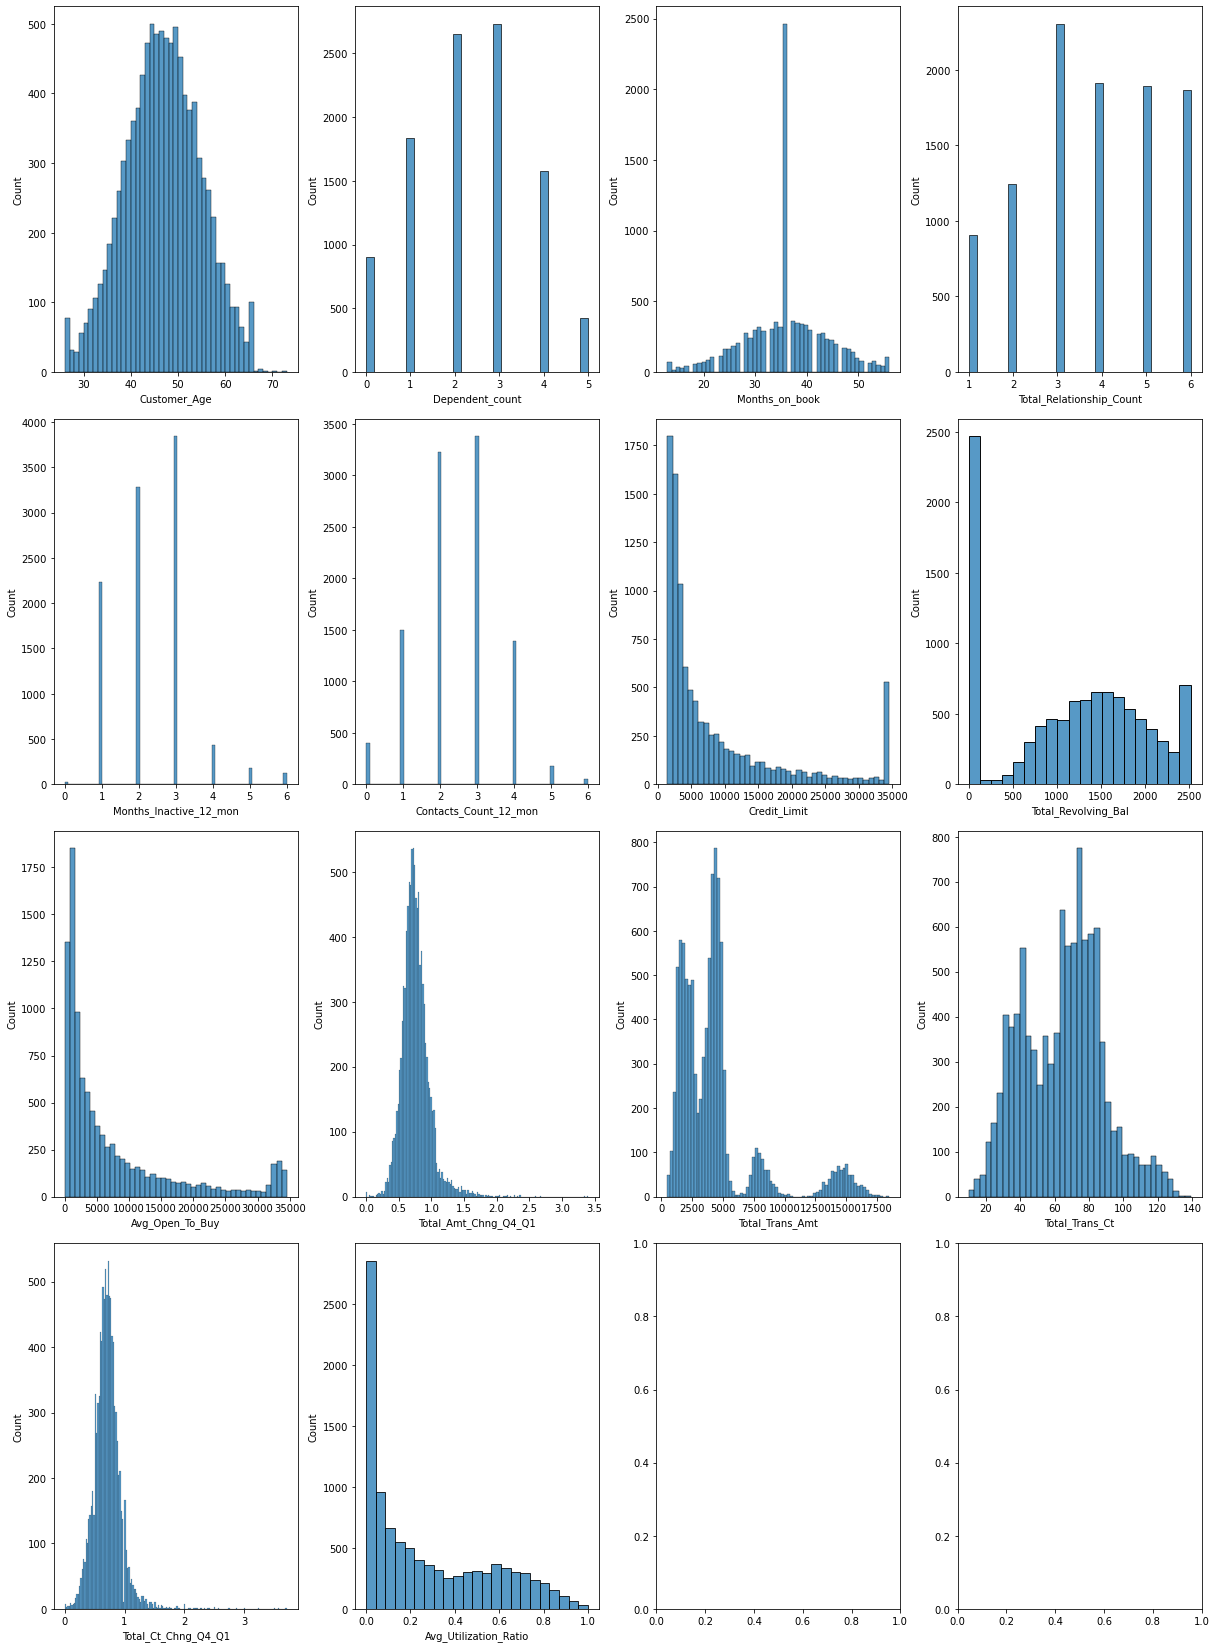

In [ ]:
# Análise das variáveis numéricas

f, axes = plt.subplots(4, 4, figsize=(17,23)) 
y=0

for name in num_cols:
    i, j = divmod(y, 4)
    sns.histplot(data=df1, x=name, ax=axes[i, j])
    y+=1

plt.tight_layout()
plt.show()

In [ ]:
# Conclusões:

# - idade: aproxima-se de uma distribuição normal
# - dependentes: maioria dos clientes tem 1ou+ dependente
# - tempo de cliente: aproxima-se de uma distribuição normal com alto desvio padrão. Porém 36 meses tem uma quantidade muito discrepante.
# 		será que teve alguma promoção 3 anos atrás?
#       além disso, a cada 5 ou 6 meses, existe um buraco na distribuição. Será que não são admitidos novos clientes em virada de semestre/ano fiscal? 
# - produtos: maioria dos clientes tem 3 ou + produtos do banco
# - inatividade últimos 12m: alta inatividade nos últimos 3 meses  (será que os dados realmente representam os meses em sequência?)
# - contato com banco últimos 12m: muitos contatos nos últimos 4 meses
# - limite de crédito: distribuição exponencial, porém com um comportamento estranho para limite de 35k
# - crédito rotativo: maioria dos clientes não estão parcelando o pagamento da fatura, ou seja, pagam o total da fatura em dia
# - crédito disponível: perfil próximo ao limite de crédito, uma vez que maioria dos clientes pagam total da fatura em dia
# - dif Q4/Q1 em valor: maioria dos clientes gastou menos no final do ano (Q4) em relação ao início do ano (Q1). A quantidade de transações obedece mesmo perfil.
# - total valor transacionado: aparentemente 4 grupos com perfis distintos
# - quantidade de transações: aparentemente apenas 2 grupos com perfis diferentes
# - utilização média: maioria dos clientes para fatura total em dia, portanto grande parte possui uma utlização baixa do crédito rotativo

### * 36 months on book
### * Total amount change está concentrado em um valor < 1. Portanto, a maioria dos clientes passou a gastar menos durante o ano

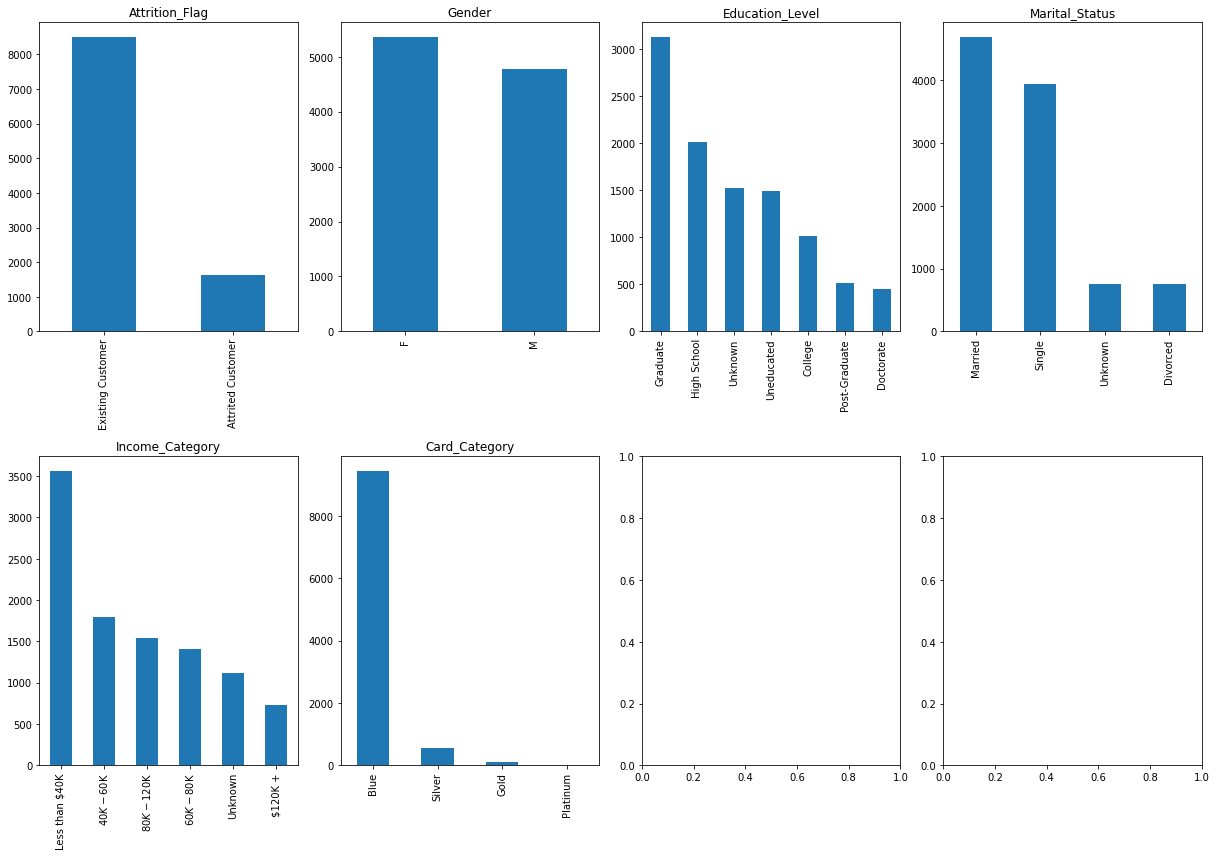

In [ ]:
# Para a análise das variáveis categóricas, 
# cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
f1, axes1 = plt.subplots(2, 4, figsize=(17,12)) 
y=0

for name in cat_cols:
    i, j = divmod(y, 4)
    df[name].value_counts().plot(kind='bar',title = name, ax=axes1[i, j])
    y+=1

plt.tight_layout()
plt.show()

In [ ]:
# Attrition_Flag: A maioria dos dados da base são referentes a clientes atuais, mas pode ser interessante entender
# o perfil socioeconomico dos clientes que saíram
# Gênero: Temos uma distribuição esquilibrada de homens e mulheres
# Nível de Educação: Parece um perfil pouco educado, com aproximadamente 4500 sem diploma universitário, 
# o que pode explicar a baixa renda média 
# Status conjugal: Maioria dos clientes casados 
# Nível de Renda: Podemos observar que a maioria dos dos clientes ganha menos de 60K por ano
# Cartão: A grande maioria tem cartões Blue, os mais básicos. Pela pouca quantidade, 
# podemos tentar descobrir um nível de renda limite para os cartões mais avançados, 
# mas a análise do perfil de cliente pode ser irrelevante 

In [ ]:
# Para analisar o pico que temos de clientes com 3 anos no banco:
df1['Months_on_book'].value_counts().head()
df36 = df1[df1['Months_on_book'] == 36]

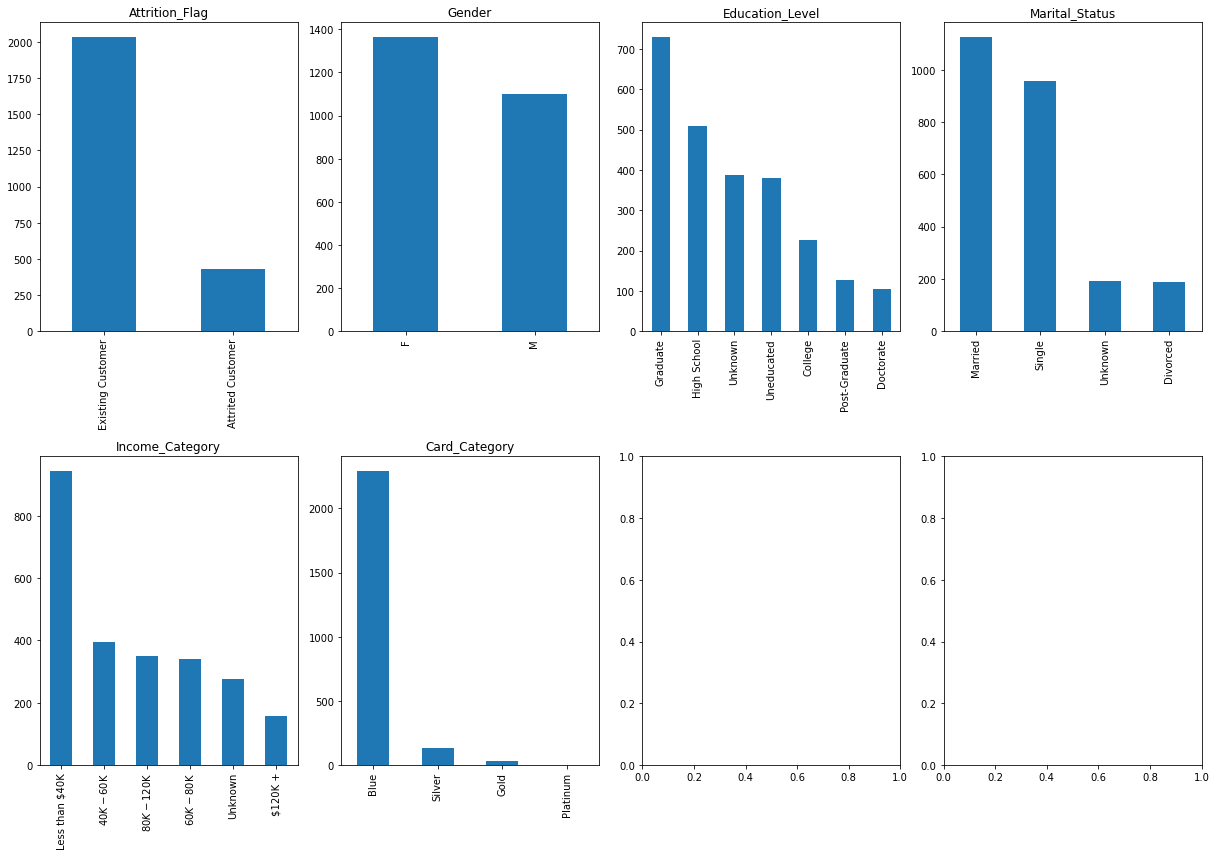

In [ ]:
f4, axes4 = plt.subplots(2, 4, figsize=(17,12)) 
y=0

for name in cat_cols:
    i, j = divmod(y, 4)
    df36[name].value_counts().plot(kind='bar',title = name, ax=axes4[i, j])
    y+=1

plt.tight_layout()
plt.show()

Portanto, a conclusão é de que o comportamento não muda para clientes de 36 meses.

----------------------------------------------

---
---

In [ ]:
# Vamos obter visualizações entre Attrition_Flag e outras variáveis categóricas 
# para ver se há alguma dependência entre os recursos categóricos.

In [ ]:
df1[cat_cols].describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [ ]:
pd.crosstab(df1['Gender'], df1['Attrition_Flag'], margins = True, margins_name = "Total")

Attrition_Flag,Attrited Customer,Existing Customer,Total
Gender,,,
F,930,4428,5358
M,697,4072,4769
Total,1627,8500,10127


In [ ]:
df_teste = df1.copy()
df_teste_linha = df_teste[df_teste['Attrition_Flag'] == 'Attrited Customer'].groupby(['Attrition_Flag','Gender','Card_Category'])[['Card_Category']].count()
df_teste_linha['Card_Category_%'] = 100*df_teste_linha['Card_Category']/(df_teste_linha['Card_Category'].sum())
df_teste_linha

Card_Category  Card_Category_%
Attrition_Flag    Gender Card_Category                                
Attrited Customer F      Blue                     890            54.70
                         Gold                       8             0.49
                         Platinum                   4             0.25
                         Silver                    28             1.72
                  M      Blue                     629            38.66
                         Gold                      13             0.80
                         Platinum                   1             0.06
                         Silver                    54             3.32

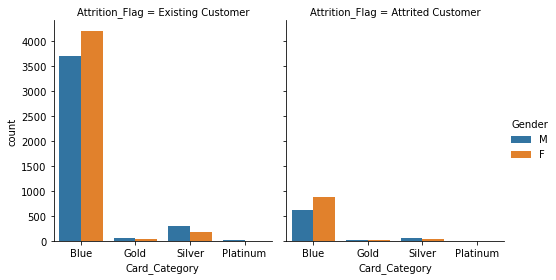

In [ ]:
sns.catplot(x="Card_Category", hue="Gender", col="Attrition_Flag",
                data=df1, kind="count",
                height=4, aspect=.9);

Observando os gráficos e as tabelas concluimos que:
a. s mulheres estão mais presentes na categoria Blue ao passo que os homens apresentam maior representatividade nas demais categorias;
b. As diferenças percentuais entre attrited e ~attrited não são tão expressivas a ponto de indicar alguma explicabilidade/tendência

Attrition_Flag,Attrited Customer,Existing Customer,% all
Gender,,,
F,0.09,0.44,0.53
M,0.07,0.40,0.47
% all,0.16,0.84,1.00


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Gender'>

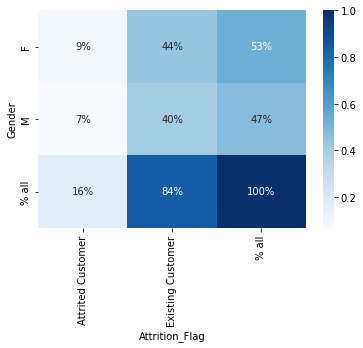

In [ ]:
#Dado o gênero (feminino/masculino) qual é a probabilidade de ser attrited/existing???
cross = pd.crosstab(df1['Gender'], 
            df1['Attrition_Flag'], 
            margins = True, 
            margins_name = "% all", 
            normalize='all')
display(cross)
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

A conclusão é de que a proporção entre H e M para attrited e ~attrite é similar

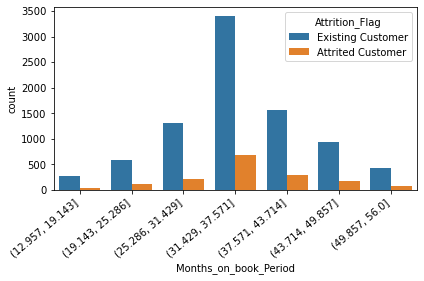

In [ ]:
df1['Months_on_book_Period'] = pd.cut(df1['Months_on_book'],
                                                bins=int(df1['Months_on_book'].std()))
ax = sns.countplot(x="Months_on_book_Period", hue='Attrition_Flag', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

O gráfico acima indica que a maioria dos clientes usa os serviços do banco até 31,4 - 37,6 meses
A distribuição tem uma forma simétrica e normal

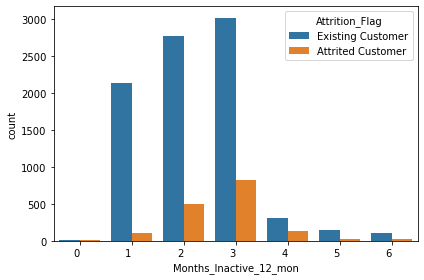

In [ ]:
ax = sns.countplot(x='Months_Inactive_12_mon', hue='Attrition_Flag', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")
plt.tight_layout()

Supondo que meses de inatividade seja a quantidade de meses dentro de 1 ano em que os clientes não utilizam os serviços do banco: o banco deve procurar trazer clientes existing de 3 para 2 e 1.

In [ ]:
df1['Customer_Age_period'] = pd.cut(np.array(df1['Customer_Age']), 
                                              bins=int(df1.Customer_Age.std()),
                                              precision=0)

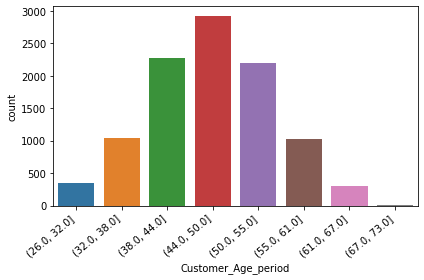

In [ ]:
ax = sns.countplot(x="Customer_Age_period", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

### Faixa de idade espaçada igualmente

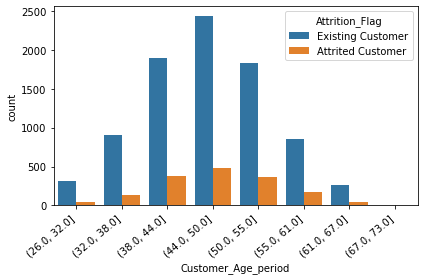

In [ ]:
ax = sns.countplot(x="Customer_Age_period", hue='Attrition_Flag', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

A maioria dos clientes tem entre 44 e 55 anos;
Observe que esta distribuição também tem um formato simétrico e normal

---
---

---  
## 3) Limpeza de dados: Considere a avaliação da existência de valores ausentes e de possíveis outliers, discutindo como estes podem ser tratados ou eliminados

In [ ]:
my_pal = {Education_Level: "r" if Education_Level== "Unknown" else "b" for Education_Level in df.Education_Level.unique()}

In [ ]:
Attrited = df1[df1['Attrition_Flag'] == 'Attrited Customer']

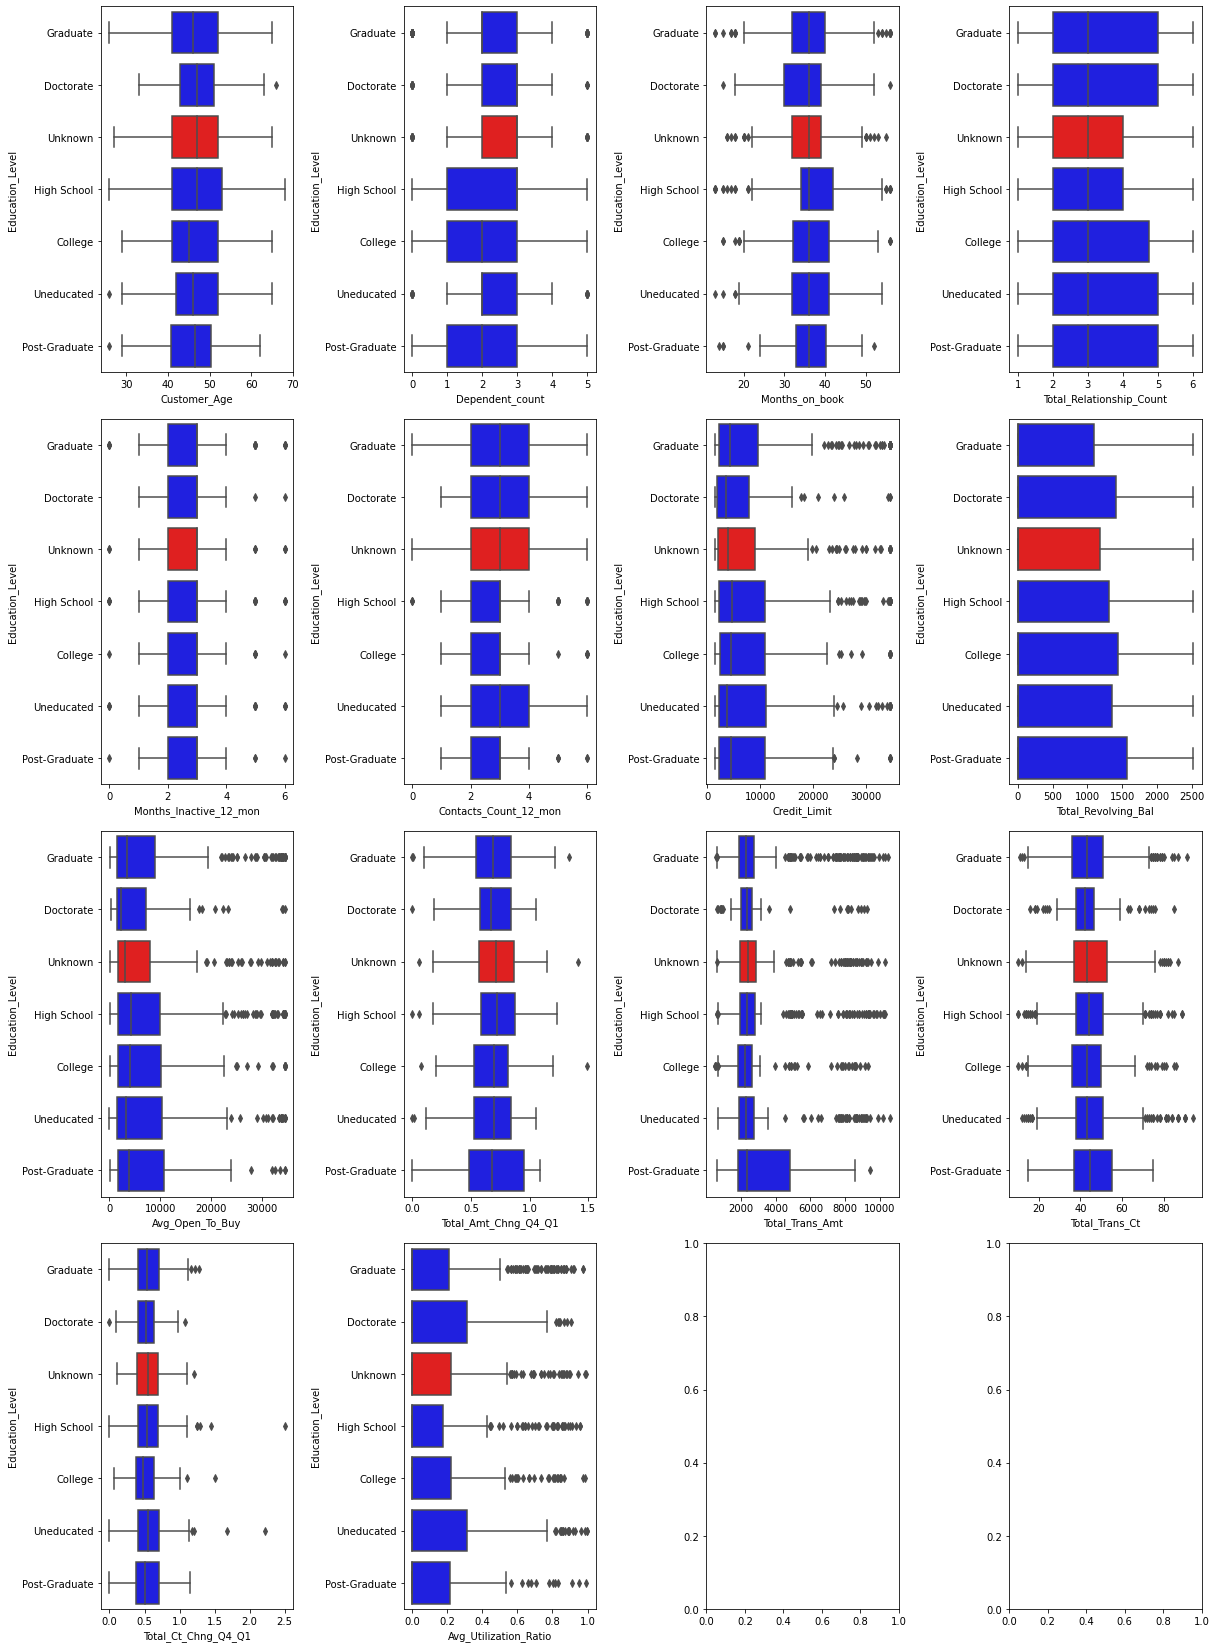

In [ ]:
f2, axes2 = plt.subplots(4, 4, figsize=(17,23)) 
y=0

for name in num_cols:
    i, j = divmod(y, 4)
    sns.boxplot(data=Attrited, y='Education_Level', ax=axes2[i, j], x=name, palette=my_pal)
    y+=1

plt.tight_layout()
plt.show()

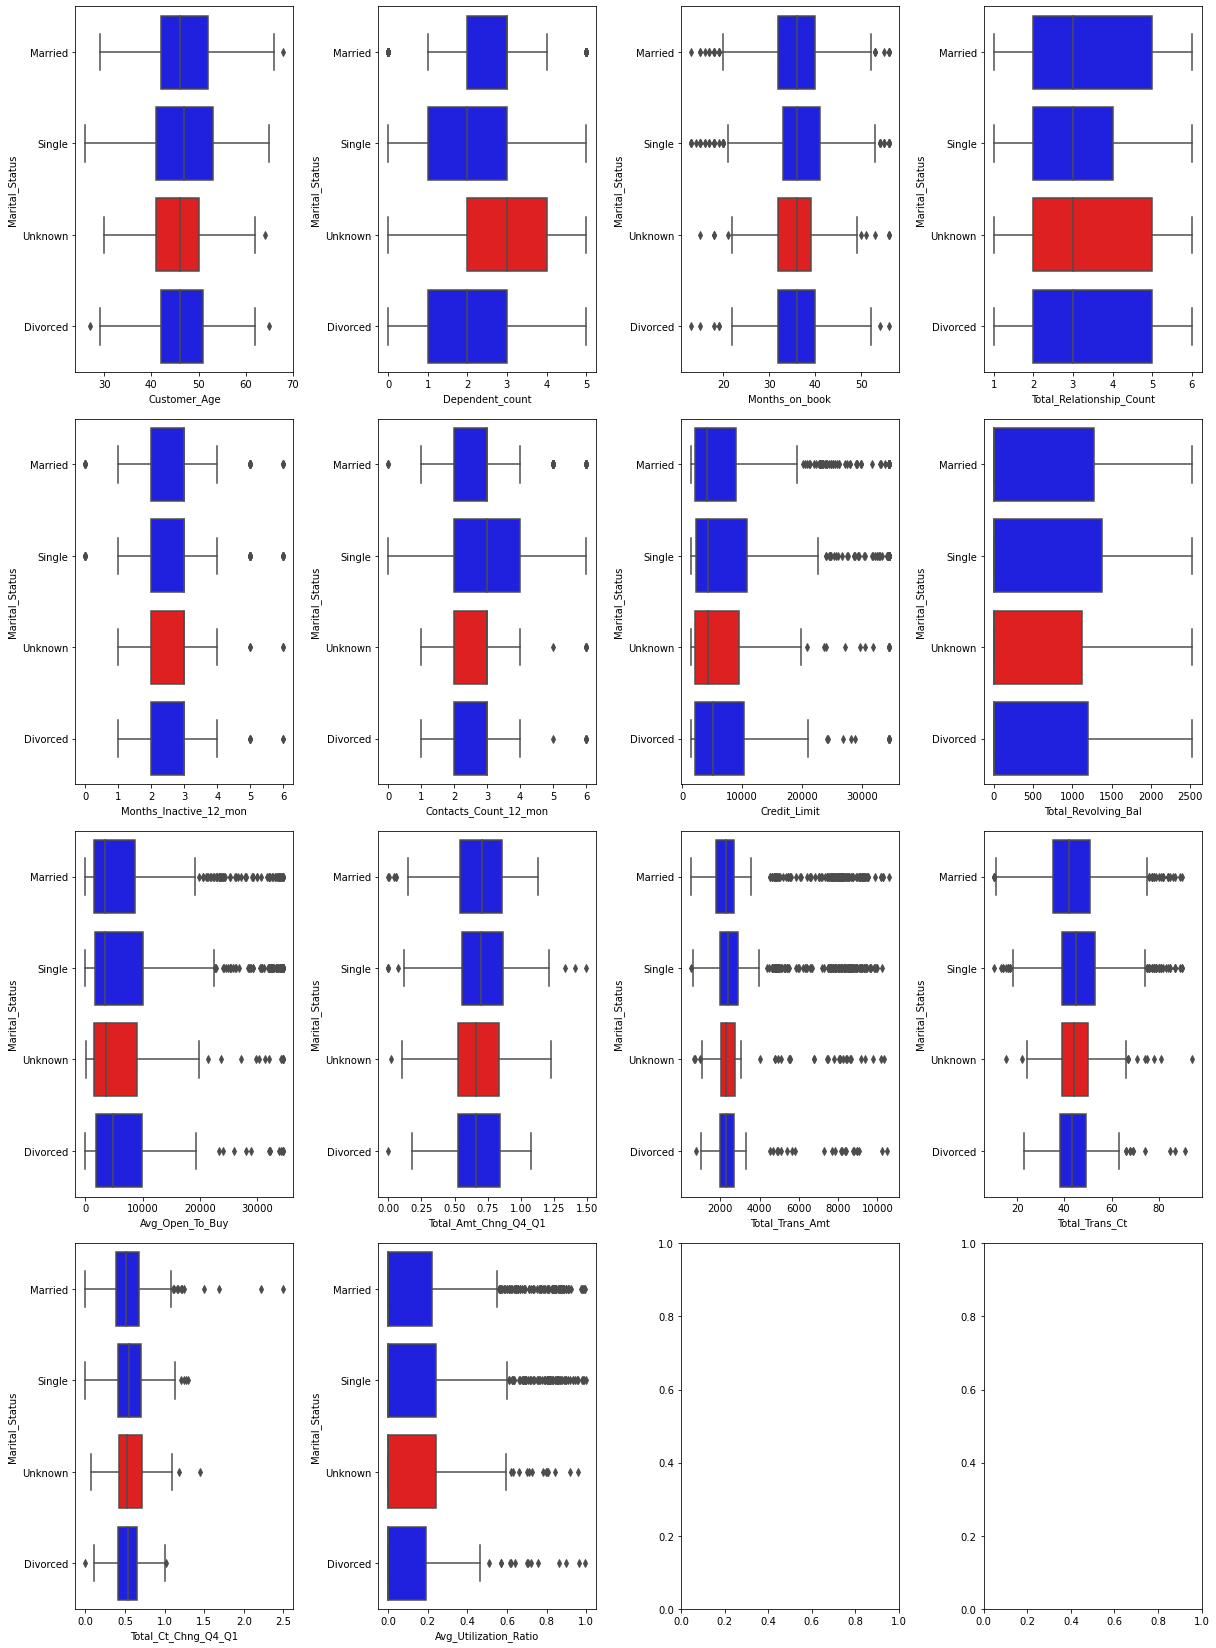

In [ ]:
my_pal = {Marital_Status: "r" if Marital_Status== "Unknown" else "b" for Marital_Status in df.Marital_Status.unique()}
f2, axes2 = plt.subplots(4, 4, figsize=(17,23)) 
y=0

for name in num_cols:
    i, j = divmod(y, 4)
    sns.boxplot(data=Attrited, y='Marital_Status', ax=axes2[i, j], x=name, palette=my_pal)
    y+=1

plt.tight_layout()
plt.show()

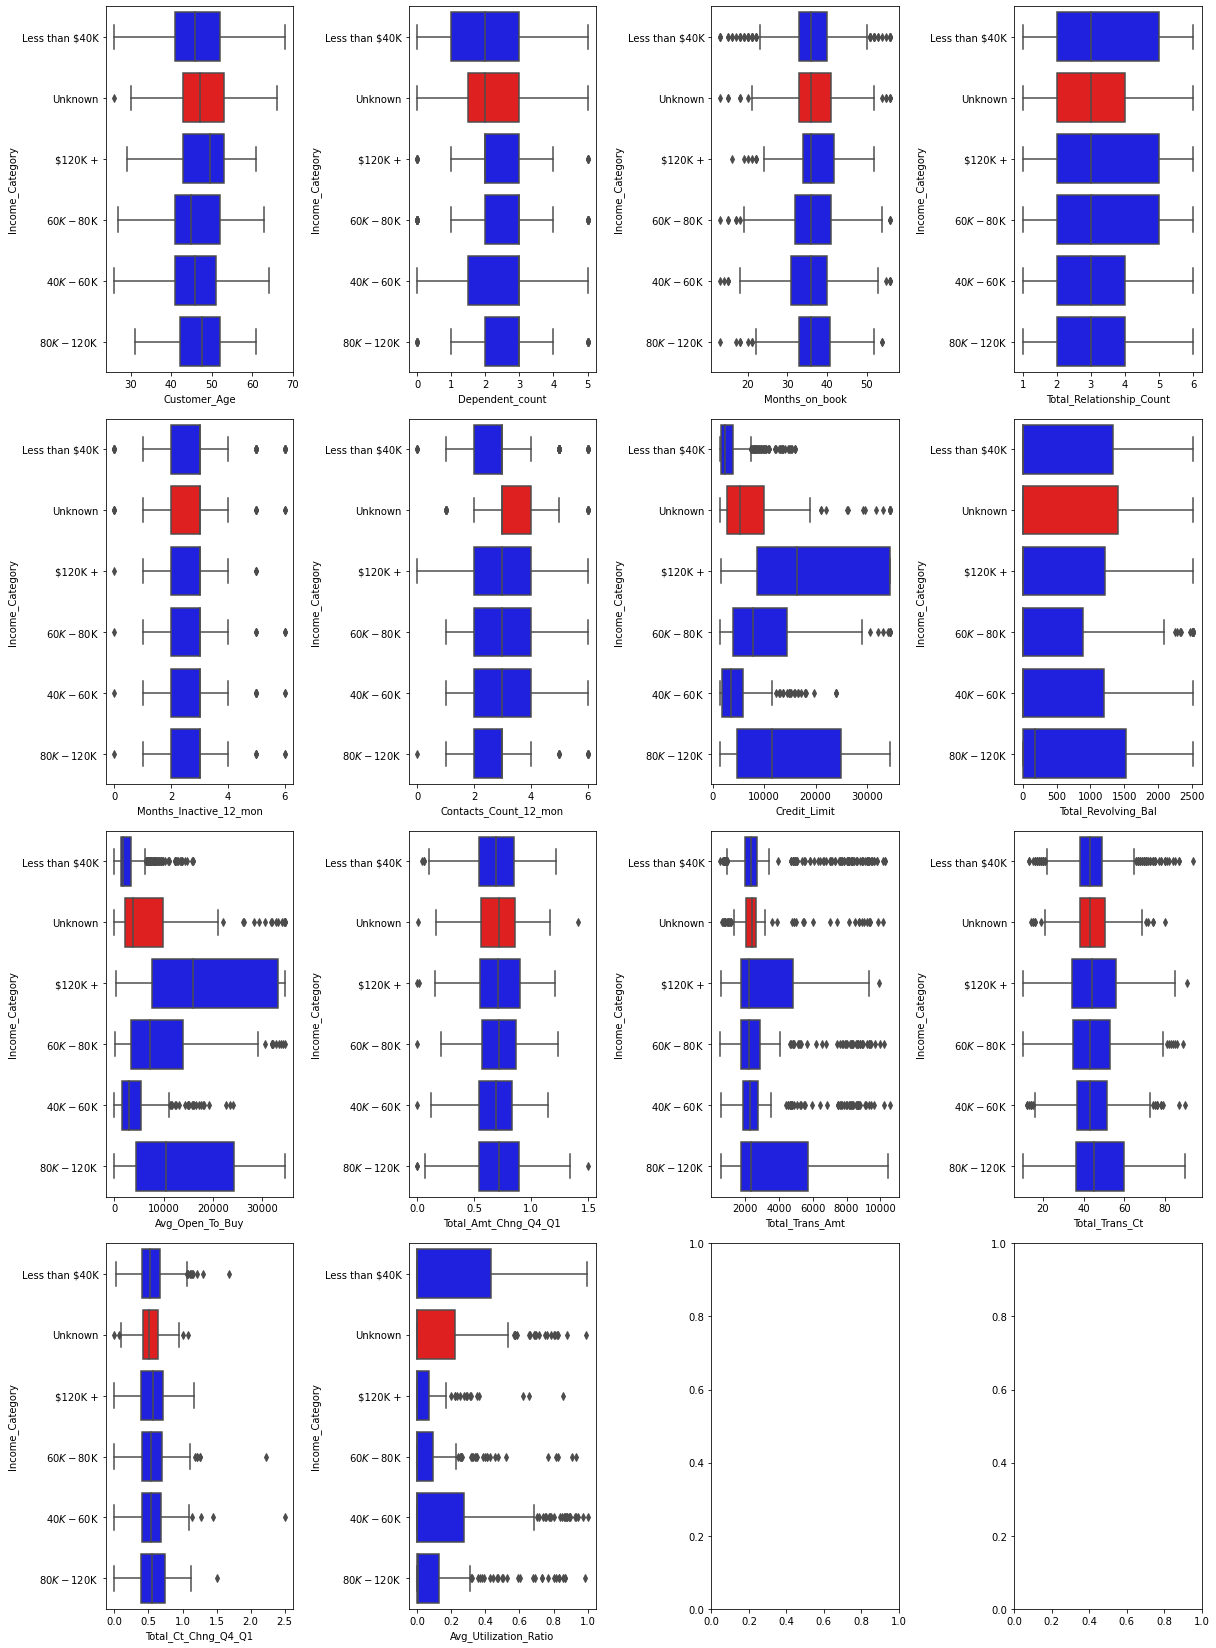

In [ ]:
my_pal = {Income_Category: "r" if Income_Category== "Unknown" else "b" for Income_Category in df.Income_Category.unique()}
f2, axes2 = plt.subplots(4, 4, figsize=(17,23)) 
y=0

for name in num_cols:
    i, j = divmod(y, 4)
    sns.boxplot(data=Attrited, y='Income_Category', ax=axes2[i, j], x=name, palette=my_pal)
    y+=1

plt.tight_layout()
plt.show()

## Portanto, não podemos levar nenhuma coluna numérica em consideração para atribuir alguma categoria ao Unknown

## Correlação com Income_Category

## Income_Category

Menor de 40K -> 30K

40K-60K -> 50K

60K-80K -> 70K

80K-120K -> 100K

Maior que 120K -> 120K

In [ ]:
df_teste = df1.copy()
df_teste.Income_Category.replace({'Less than $40K':30000},inplace=True)
df_teste.Income_Category.replace({'$40K - $60K':50000},inplace=True)
df_teste.Income_Category.replace({'$60K - $80K':70000},inplace=True)
df_teste.Income_Category.replace({'$80K - $120K':100000},inplace=True)
df_teste.Income_Category.replace({'$120K +':120000},inplace=True)
df_teste.Income_Category.replace({'Unknown':np.nan},inplace=True)

<AxesSubplot:>

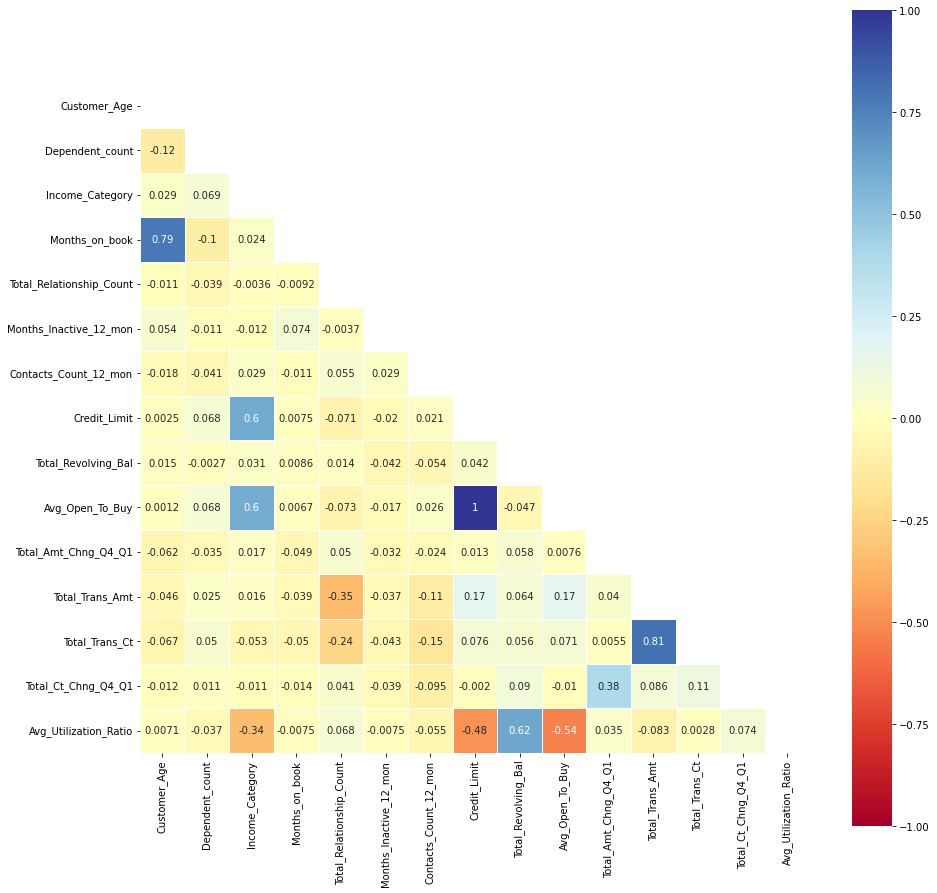

In [ ]:
cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Card_Category']
df_corr = df_teste.drop(columns=cat_cols)

mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_corr.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center= 0,
            cmap= 'RdYlBu', square=True, linewidths=.5, mask=mask)

### A correlação entre Credit Limit e Income Category não é alta (0,6). Apesar disso, esta correlação se destaca entre as demais do dataset conforme o gráfico acima aponta.

In [ ]:
df2 = df1.copy()

In [ ]:
# Como a quantidade de Unknows é expressiva optamos 
# por substituir seus respectivos valores pela moda das 
# respectivas colunas

df2.replace({'Marital_Status':{'Unknown':df2['Marital_Status'].mode()}, 
            'Income_Category':{'Unknown':df2['Income_Category'].mode()},
            'Education_Level':{'Unknown':df2['Education_Level'].mode()}},
            inplace=True)

# 4) Feature engineering: Quais variáveis você poderia criar para enriquecer a análise?

## Quanto maior o nível educacional, maior a faixa salarial?

In [ ]:
df_teste.replace({'Marital_Status':{'Unknown':df2['Marital_Status'].mode()}, 
            'Income_Category':{'Unknown':df2['Income_Category'].mode()},
            'Education_Level':{'Unknown':df2['Education_Level'].mode()}},
            inplace=True)
df_teste.groupby(['Education_Level'])[['Income_Category']].mean()

,Income_Category
Education_Level,
College,"60,375.69"
Doctorate,"59,081.36"
Graduate,"58,697.84"
High School,"60,296.42"
Post-Graduate,"59,147.12"
Uneducated,"59,708.14"


Não existem diferenças significativas entre as médias de renda. Entretanto vale destacar que a média salarial dos clientes que não possuem formação alguma chega a ser maior que daqueles que se graduam ou que fazem pós graduação ou que obtem o doutorado.

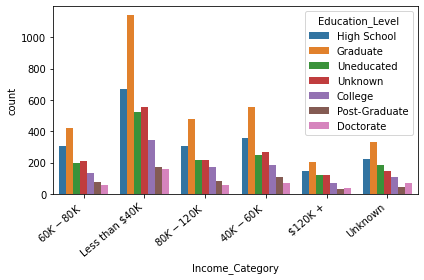

In [ ]:
ax = sns.countplot(x='Income_Category', hue="Education_Level", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

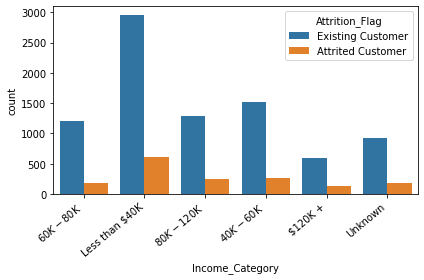

In [ ]:
ax = sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

Ao mesmo tempo, o gráfico mostra que grande parte dos clientes têm uma renda abaixo de $40K, o que nos induz a entender que a aproximação de um intervalo para moda/média pode distorcer o interpretação final de renda média por grupo.

## Solteiros e sem dependentes tem limite maior?

In [ ]:
df_single = df_teste[df['Marital_Status'] == 'Single']
# df_single
df_single.groupby(['Marital_Status','Dependent_count'])[['Credit_Limit']].mean()

Credit_Limit
Marital_Status Dependent_count              
Single         0                    7,695.80
               1                    8,279.27
               2                    9,079.85
               3                    9,352.50
               4                   10,167.22
               5                    8,661.33

Em média, os solteiros sem dependentes apresentam os limites menores. Nota-se que de 0 a 4 dependendentes a média do limite tende a crescer, porém ao se alcançar 5 dependentes ele decai a um nível de crédito que fica entre os solteiros que tem 1 e 2 dependentes.

## Clientes mais jovens usam mais crédito rotativo?

In [ ]:
df_teste = df1.copy()
df_teste.Income_Category.replace({'Less than $40K':30000},inplace=True)
df_teste.Income_Category.replace({'$40K - $60K':50000},inplace=True)
df_teste.Income_Category.replace({'$60K - $80K':70000},inplace=True)
df_teste.Income_Category.replace({'$80K - $120K':100000},inplace=True)
df_teste.Income_Category.replace({'$120K +':120000},inplace=True)
df_teste.Income_Category.replace({'Unknown':np.nan},inplace=True)

In [ ]:
df_teste.replace({'Marital_Status':{'Unknown':df2['Marital_Status'].mode()}, 
            'Income_Category':{'Unknown':df2['Income_Category'].mode()},
            'Education_Level':{'Unknown':df2['Education_Level'].mode()}},
            inplace=True)

In [ ]:
df_teste['Customer_Age_period'] = pd.cut(np.array(df_teste['Customer_Age']), 
                                              bins=int(df1.Customer_Age.std()),
                                              precision=0)
df_teste.drop('Customer_Age', axis=1, inplace = True)

In [ ]:
df_teste.groupby(['Customer_Age_period'])[['Total_Revolving_Bal']].mean()

,Total_Revolving_Bal
Customer_Age_period,
"(26.0, 32.0]","1,109.53"
"(32.0, 38.0]","1,199.43"
"(38.0, 44.0]","1,155.40"
"(44.0, 50.0]","1,129.54"
"(50.0, 55.0]","1,184.05"
"(55.0, 61.0]","1,204.89"
"(61.0, 67.0]","1,178.19"
"(67.0, 73.0]","1,293.00"


Não, são os clientes mais velhos que em média mais usam o crédito rotativo.

## Clientes com mais escolaridade apresentam uma faixa de renda maior?

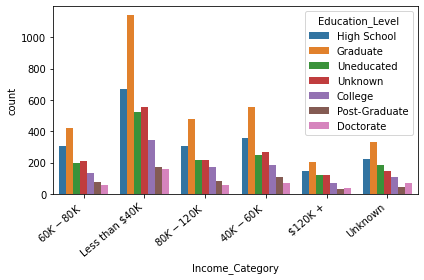

In [ ]:
ax = sns.countplot(x='Income_Category', hue="Education_Level", data=df1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

---
---

## Qual é a média de cada cartão?

In [ ]:
for i in df2['Card_Category'].unique():
    df2.loc[df2['Card_Category'] == i,'Avg_Credit_Limit_per_Card_Category'] = df2.loc[df2['Card_Category'] == i,'Credit_Limit'].mean()
display(df2.groupby('Card_Category')[['Avg_Credit_Limit_per_Card_Category']].max())
display(df2.groupby('Card_Category')[['Avg_Months_on_book_per_Card_Category']].max())

for i in df2['Card_Category'].unique():
    df2.loc[df2['Card_Category'] == i,'Avg_Avg_Utilization_Ratio_per_Card_Category'] = df2.loc[df2['Card_Category'] == i,'Avg_Utilization_Ratio'].mean()
display(df2.groupby('Card_Category')[['Avg_Avg_Utilization_Ratio_per_Card_Category']].max())

,Avg_Credit_Limit_per_Card_Category
Card_Category,
Blue,"7,363.78"
Silver,"25,277.84"
Gold,"28,416.37"
Platinum,"30,283.45"


,Avg_Months_on_book_per_Card_Category
Card_Category,
Blue,35.96
Silver,35.45
Gold,35.53
Platinum,36.25


,Avg_Avg_Utilization_Ratio_per_Card_Category
Card_Category,
Blue,0.29
Silver,0.06
Gold,0.06
Platinum,0.04


In [ ]:
df2['Avg_Trans_Amount'] = df2['Total_Trans_Amt']/df2['Total_Trans_Ct']
for i in df2['Card_Category'].unique():
    df2.loc[df2['Card_Category'] == i,'Avg_Avg_Trans_Amount_per_Card_Category'] = df2.loc[df2['Card_Category'] == i,'Avg_Trans_Amount']
    display(df2.groupby(['Gender','Attrition_Flag','Card_Category'])[['Avg_Avg_Trans_Amount_per_Card_Category']].max())

Avg_Avg_Trans_Amount_per_Card_Category
Gender Attrition_Flag    Card_Category                                        
F      Attrited Customer Blue                                           177.67
                         Silver                                         168.75
                         Gold                                           142.81
                         Platinum                                       108.18
       Existing Customer Blue                                           190.19
                         Silver                                         158.29
                         Gold                                           152.81
                         Platinum                                       135.87
M      Attrited Customer Blue                                           180.06
                         Silver                                         183.54
                         Gold                                           136.73
                         Platinum                                        73.20
       Existing Customer Blue                                           173.60
                         Silver                                         161.72
                         Gold                                           150.57
                         Platinum                                       141.36

Avg_Avg_Trans_Amount_per_Card_Category
Gender Attrition_Flag    Card_Category                                        
F      Attrited Customer Blue                                           177.67
                         Silver                                         168.75
                         Gold                                           142.81
                         Platinum                                       108.18
       Existing Customer Blue                                           190.19
                         Silver                                         158.29
                         Gold                                           152.81
                         Platinum                                       135.87
M      Attrited Customer Blue                                           180.06
                         Silver                                         183.54
                         Gold                                           136.73
                         Platinum                                        73.20
       Existing Customer Blue                                           173.60
                         Silver                                         161.72
                         Gold                                           150.57
                         Platinum                                       141.36

Avg_Avg_Trans_Amount_per_Card_Category
Gender Attrition_Flag    Card_Category                                        
F      Attrited Customer Blue                                           177.67
                         Silver                                         168.75
                         Gold                                           142.81
                         Platinum                                       108.18
       Existing Customer Blue                                           190.19
                         Silver                                         158.29
                         Gold                                           152.81
                         Platinum                                       135.87
M      Attrited Customer Blue                                           180.06
                         Silver                                         183.54
                         Gold                                           136.73
                         Platinum                                        73.20
       Existing Customer Blue                                           173.60
                         Silver                                         161.72
                         Gold                                           150.57
                         Platinum                                       141.36

Avg_Avg_Trans_Amount_per_Card_Category
Gender Attrition_Flag    Card_Category                                        
F      Attrited Customer Blue                                           177.67
                         Silver                                         168.75
                         Gold                                           142.81
                         Platinum                                       108.18
       Existing Customer Blue                                           190.19
                         Silver                                         158.29
                         Gold                                           152.81
                         Platinum                                       135.87
M      Attrited Customer Blue                                           180.06
                         Silver                                         183.54
                         Gold                                           136.73
                         Platinum                                        73.20
       Existing Customer Blue                                           173.60
                         Silver                                         161.72
                         Gold                                           150.57
                         Platinum                                       141.36

In [ ]:
cat_card = pd.CategoricalDtype( ['Blue', 'Silver', 'Gold', 'Platinum'], ordered=True)

df2['Card_Category'] = df2['Card_Category'].astype(cat_card)

df2.pivot_table(index = ['Gender', 'Attrition_Flag', 'Customer_Age'], columns = 'Card_Category', values = 'Avg_Avg_Trans_Amount_per_Card_Category', aggfunc = max).sort_values(by = 'Card_Category', axis = 1)

Card_Category                           Blue  Silver  Gold  Platinum
Gender Attrition_Flag    Customer_Age                               
F      Attrited Customer 26            47.35     NaN   NaN       NaN
                         27            66.03     NaN   NaN       NaN
                         28            54.20     NaN   NaN       NaN
                         29            64.47     NaN   NaN       NaN
                         30           146.70     NaN   NaN       NaN
...                                      ...     ...   ...       ...
M      Existing Customer 65            84.22   43.29   NaN       NaN
                         67            39.79     NaN   NaN       NaN
                         68            59.69     NaN   NaN       NaN
                         70            81.80     NaN   NaN       NaN
                         73            51.91     NaN   NaN       NaN

[167 rows x 4 columns]

In [ ]:
# Observamos que o banco perdeu os clientes Platinum mais velhos (55.0, 61.0]: 90.49

cat_card = pd.CategoricalDtype( ['Blue', 'Silver', 'Gold', 'Platinum'], ordered=True)

df2['Card_Category'] = df2['Card_Category'].astype(cat_card)

df2.pivot_table(index = ['Attrition_Flag', 'Customer_Age_period'], columns = ['Gender', 'Card_Category'], values = 'Avg_Avg_Trans_Amount_per_Card_Category', aggfunc = max).sort_values(by = 'Card_Category', axis = 1)

Gender                                     F      M      F      M      F  \
Card_Category                           Blue   Blue Silver Silver   Gold   
Attrition_Flag    Customer_Age_period                                      
Attrited Customer (26.0, 32.0]        146.70 150.16    NaN 136.75    NaN   
                  (32.0, 38.0]        158.27 180.06 116.12 183.54 104.94   
                  (38.0, 44.0]        177.67 142.77 168.75 151.52 107.29   
                  (44.0, 50.0]        171.52 158.61 119.05 126.03 142.81   
                  (50.0, 55.0]        151.68 163.65 141.06 145.15    NaN   
                  (55.0, 61.0]        154.09 149.31    NaN 128.56    NaN   
                  (61.0, 67.0]        165.32  72.52  58.74  50.69    NaN   
                  (67.0, 73.0]           NaN  36.19    NaN    NaN    NaN   
Existing Customer (26.0, 32.0]        156.79 170.62 139.85 155.93  47.67   
                  (32.0, 38.0]        166.84 172.98 128.50 150.54 102.49   
                  (38.0, 44.0]        167.90 169.05 157.85 153.40 138.15   
                  (44.0, 50.0]        163.39 171.15 153.91 161.72 137.95   
                  (50.0, 55.0]        190.19 173.60 146.71 157.40 152.81   
                  (55.0, 61.0]        168.91 162.51 158.29 157.41 131.68   
                  (61.0, 67.0]         82.31  90.88  58.27  76.97  65.00   
                  (67.0, 73.0]           NaN  81.80    NaN    NaN    NaN   

Gender                                     M        F        M  
Card_Category                           Gold Platinum Platinum  
Attrition_Flag    Customer_Age_period                           
Attrited Customer (26.0, 32.0]           NaN      NaN      NaN  
                  (32.0, 38.0]        127.92      NaN      NaN  
                  (38.0, 44.0]        124.97      NaN    73.20  
                  (44.0, 50.0]        104.65   108.18      NaN  
                  (50.0, 55.0]        136.73    83.35      NaN  
                  (55.0, 61.0]        119.44      NaN      NaN  
                  (61.0, 67.0]           NaN      NaN      NaN  
                  (67.0, 73.0]           NaN      NaN      NaN  
Existing Customer (26.0, 32.0]        123.54      NaN      NaN  
                  (32.0, 38.0]        126.97      NaN      NaN  
                  (38.0, 44.0]        129.31    91.72   135.11  
                  (44.0, 50.0]        150.57   122.15   141.36  
                  (50.0, 55.0]        137.37   135.87   131.87  
                  (55.0, 61.0]        117.53    90.49      NaN  
                  (61.0, 67.0]           NaN      NaN      NaN  
                  (67.0, 73.0]           NaN      NaN      NaN

# Principal conclusão:
# A) Incentivar a rotatividade
# B) Diminuir o tempo de inatividade

## 5) Enriquecimento da base: Inclua qualquer outra informação/análise que achar importante.

Focamos em destrinchar a base fornecida, que já contemplou um detalhamento muito bom :)

## 6) Que outras bases externas ou internas voce buscaria para enriquecer as análises?

Indicadores de inadimplência poderiam ser usados. Over 30, Over 90, Informações de crédito de bureaus